In [1]:
# import dependencies
import json
import pandas as pd
import os
import csv
import numpy
import requests
import matplotlib.pyplot as plt
from pprint import pprint

#set up API URL
api_key = "a2rOTe8PfBiJBwTOSlRbteARqAEa0s6DsRyoSOOF"
url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?'

search = 'school.degrees_awarded.predominant=3&_fields=id,school.name,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,school.region_id,latest.earnings.10_yrs_after_entry.median,latest.earnings.6_yrs_after_entry.median,latest.repayment.5_yr_repayment.completers_rate,latest.repayment.7_yr_repayment.completers_rate,latest.repayment.3_yr_repayment.completers_rate'

search_url = url + search + '&api_key=' + api_key

response = requests.get(search_url)
response_json = response.json()


In [2]:
# # Store school id, name, regions, etc. in list

# school_ids_list = []
# schools_list = []
# regions_list = []
# school_ids_list = []
# tuition_in_state_list = []
# tuition_out_state_list = []
# list_earnings_10_yrs_after_entry = []
# list_earnings_6_yrs_after_entry = []

# for page in range (0,105):
#     search_url = f'{url}{search}&page={page}&api_key={api_key}'
#     response = requests.get(search_url)
#     response_json = response.json()
       
#     for num in range(0,20):
#         school_id = response_json['results'][num]['id']
#         school_ids_list.append(school_id)
#         school_name = response_json['results'][num]['school.name']
#         schools_list.append(school_name)  
#         region_id = response_json['results'][num]['school.region_id']
#         regions_list.append(region_id)              
#         tuition_in = response_json['results'][num]['latest.cost.tuition.in_state']
#         tuition_in_state_list.append(tuition_in)  
#         tuition_out = response_json['results'][num]['latest.cost.tuition.out_of_state']
#         tuition_out_state_list.append(tuition_out)
#         earnings_10yrs_after = response_json['results'][num]['latest.earnings.10_yrs_after_entry.median']
#         earnings_6yrs_after = response_json['results'][num]['latest.earnings.6_yrs_after_entry.median']
#         list_earnings_10_yrs_after_entry.append(earnings_10yrs_after)
#         list_earnings_6_yrs_after_entry.append(earnings_6yrs_after)

# # set up school info in dataframe and export to CSV 
# schoolinfo_df = pd.DataFrame({
#     "school_id": school_ids_list,
#     "school": schools_list,
#     "region": regions_list,
#     "tuition_in_state": tuition_in_state_list,
#     "tuition_out_state": tuition_out_state_list,
#     "earnings6years": list_earnings_6_yrs_after_entry,
#     "earnings10years": list_earnings_10_yrs_after_entry,
# })

# schoolinfo_df.to_csv("cost_earnings_stat_final.csv", index=False, header=True)


                
            


In [3]:
region_stats = pd.read_csv('cost_earnings_stat_final.csv')
region_stats.head()

,school_id,school,region,tuition_in_state,tuition_out_state,earnings6years,earnings10years
0,445188,University of California-Merced,8,13262.0,39944.0,36900.0,NaN
1,446792,Sanford-Brown College-Las Vegas,8,NaN,NaN,23500.0,29300.0
2,446808,Sanford-Brown College-Seattle,8,NaN,NaN,23500.0,29300.0
3,446048,Ave Maria University,5,19128.0,19128.0,29800.0,32800.0
4,446668,The Art Institute of Ohio-Cincinnati,3,NaN,NaN,27200.0,34100.0


In [4]:
#Size before data trimming

region_stats.groupby("region").size()


region
0      1
1    165
2    394
3    306
4    212
5    491
6    170
7     69
8    242
9     50
dtype: int64

In [6]:
#create summary table for all region aggregate 
grouped_region_stats = region_stats.groupby(['region']).mean()
region_mean = grouped_region_stats.drop(columns=["school_id"])
region_mean['earnings_cost_ratio'] = region_mean['earnings6years']/region_mean['tuition_in_state']


#drop region 0 and 9
mean_df_clean = region_mean.drop([0,9])
mean_df_clean

,tuition_in_state,tuition_out_state,earnings6years,earnings10years,earnings_cost_ratio
region,,,,,
1,29905.316129,33065.832258,38964.935065,49488.961039,1.302943
2,23880.581579,26314.510526,37623.353293,48614.329268,1.575479
3,23394.398601,26112.118881,35970.979021,43784.210526,1.537589
4,20240.683417,22193.758794,35481.280788,42301.970443,1.752969
5,17880.507463,21750.272921,32163.238512,40057.111111,1.798788
6,16203.545455,20451.064935,35458.974359,43019.230769,2.188347
7,14283.903226,20443.790323,33803.125000,41463.934426,2.366519
8,23048.177570,27207.962617,38133.333333,47831.188119,1.654505


# AVERAGE TUITION AND EARNINGS PER REGION PLOT

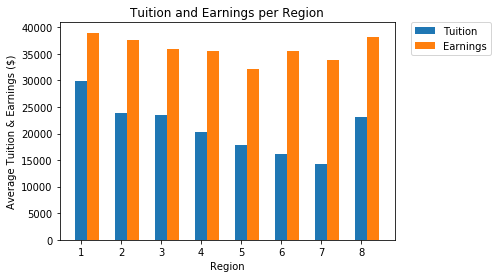

In [7]:
#average (region, tuition) & (region, earnings6years)
y1 = mean_df_clean["tuition_in_state"]
y2 = mean_df_clean["earnings6years"]

x_axis = [x for x in range(1,9)]
x_axis2 = [x+0.3 for x in range(1,9)]

plt.bar(x_axis, y1, width = 0.3, label="Tuition" )
plt.bar(x_axis2, y2, width = 0.3, label="Earnings")

plt.title("Tuition and Earnings per Region")
plt.xlabel("Region")
plt.ylabel("Average Tuition & Earnings ($)")
plt.legend(title=["Legend"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save fig
#plt.savefig("Plots/Tuition&EarningsPerRegion.png")

# Earnings-cost ratio per region

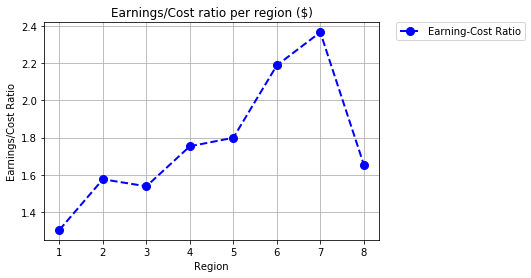

In [8]:
x_axis = [x for x in range(1,9)]
y_axis = mean_df_clean["earnings_cost_ratio"]

plt.plot(x_axis, y_axis, 'go--', linewidth=2, markersize=8, color='blue', label="Earning-Cost Ratio")

plt.title("Earnings/Cost ratio per region ($)")
plt.xlabel("Region")
plt.ylabel("Earnings/Cost Ratio")
plt.grid()
plt.legend(title=[""])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save fig
#plt.savefig("Plots/Earnings-CostRatioPerRegion.png")

In [10]:
#list containing 'bins' for tuition
quartile_bins = []

#bin_names are given after tuition is binned i.e
#the bin_names are up for change
bins = [0,10000,18000,32000,100000]
bin_names = ["less_10k","10k_18k","18k_32k", "greater_32k"]

#list reference for obtaining min, median, and max tution
tuition_list = region_stats['tuition_in_state']

#obtain 25th percentile, then append to list
twentyfive_Percentile = tuition_list.quantile(0.25)
quartile_bins.append(twentyfive_Percentile)

#obtain 50th percentile, then append to list
fifty_Percentile = tuition_list.quantile(0.50)
quartile_bins.append(fifty_Percentile)

#obtain 75th percentile, then append to list
seventyFive_Percentile = tuition_list.quantile(0.75)
quartile_bins.append(seventyFive_Percentile)

#obtain 100th percentile, then append to list
ninetyNine_Percentile = tuition_list.quantile(1)
quartile_bins.append(ninetyNine_Percentile)

#print bins list
quartile_bins

[9516.0, 17325.0, 30782.0, 55056.0]

In [13]:
#add Tuition Cost Tier column to dataframe
region_stats["tuition_cost_tier"] = pd.cut(region_stats["tuition_in_state"], bins, labels=bin_names)

#store variables for ratio calculations
cost = region_stats['tuition_in_state']
earnings6 = region_stats['earnings6years']
earnings10 = region_stats['earnings10years']

#add columns for earnings/cost ratio, 6 - 10 year earnings growth ratio
region_stats['earnings_cost_ratio'] = earnings6/cost
region_stats['earnings_growth_y6_y10'] = earnings10/earnings6
region_stats['weighted_growth_to_tuition'] = region_stats['earnings_cost_ratio'] * region_stats['earnings_growth_y6_y10']



In [15]:
#drop uneccesary columns for analysis
clean_info = region_stats.drop(columns=['school_id', 'tuition_out_state'])


In [16]:
#organize seperate dataframes by cost tier for plotting + drop region 0 & 9 due to irrelevancy 
df0_10k = clean_info.loc[clean_info["tuition_cost_tier"] == 'less_10k']
df0_10k_edit0 = df0_10k[df0_10k.region != 0]
df0_10k_edit9 = df0_10k_edit0[df0_10k_edit0.region != 9]

df10_18k = clean_info.loc[clean_info["tuition_cost_tier"] == '10k_18k']
df10_18k_edit = df10_18k[df10_18k.region != 9]

df18_32 = clean_info.loc[clean_info["tuition_cost_tier"] == '18k_32k']

df32 = clean_info.loc[clean_info["tuition_cost_tier"] == 'greater_32k']

In [17]:
#aggregate mean value for plotting
df0_10k_grouped = df0_10k_edit9.groupby(['region']).mean()

df10_18k_grouped = df10_18k_edit.groupby(['region']).mean()

df18_32_grouped = df18_32.groupby(['region']).mean()

df32_grouped = df32.groupby(['region']).mean()


In [18]:
#set up lists containing calculated rations for plotting 
earningscost10k = [earningscost for earningscost in df0_10k_grouped['earnings_cost_ratio']]
earningsgrowth10k = [earnings for earnings in df0_10k_grouped['earnings_growth_y6_y10']]
weighted_growth10k = [worthit for worthit in df0_10k_grouped['weighted_growth_to_tuition']]

earningscost10k_18k = [earningscost for earningscost in df10_18k_grouped['earnings_cost_ratio']]
earningsgrowth10k_18k = [earnings for earnings in df10_18k_grouped['earnings_growth_y6_y10']]
weighted_growth10k_18k = [worthit for worthit in df10_18k_grouped['weighted_growth_to_tuition']]

earningscost18k_32k = [earningscost for earningscost in df18_32_grouped['earnings_cost_ratio']]
earningsgrowth18k_32k = [earnings for earnings in df18_32_grouped['earnings_growth_y6_y10']]
weighted_growth18k_32k = [worthit for worthit in df18_32_grouped['weighted_growth_to_tuition']]

earningscost32k = [earningscost for earningscost in df32_grouped['earnings_cost_ratio']]
earningsgrowth32kk = [earnings for earnings in df32_grouped['earnings_growth_y6_y10']]
weighted_growth32k = [worthit for worthit in df32_grouped['weighted_growth_to_tuition']]

In [19]:
#test group by region
table10k = df0_10k_grouped.drop(['tuition_in_state','earnings6years',
                                 'earnings10years','earnings_cost_ratio','earnings_growth_y6_y10'], axis = 1)

table10k.rename(columns={'weighted_growth_to_tuition':'Worth-It Ratio'})

,Worth-It Ratio
region,
1,4.927779
2,5.402779
3,5.107863
4,5.570131
5,5.361041
6,5.486618
7,6.148850
8,6.444753


# Tiered Earnings/Cost ratio

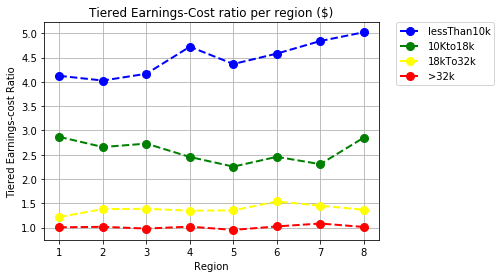

In [20]:
#bins = [0,10000,18000,32000,100000]
#bin_names = ["less_10k","10k_18k","18k_32k", "greater_32k"]

#(x,y) values for 4 tiers *note x value doesn't change only y does
x_axis = [x for x in range(1,9)]
y_axis1 = df0_10k_grouped["earnings_cost_ratio"]
y_axis2 = df10_18k_grouped["earnings_cost_ratio"]
y_axis3 = df18_32_grouped["earnings_cost_ratio"]
y_axis4 = df32_grouped["earnings_cost_ratio"]

#tiered 
lessThan10k = plt.plot(x_axis, y_axis1, 'go--', linewidth=2, markersize=8, color='blue', label='lessThan10k')
TenKto18k = plt.plot(x_axis, y_axis2, 'go--', linewidth=2, markersize=8, color='green', label='10Kto18k')
EighteenTo32k = plt.plot(x_axis, y_axis3, 'go--', linewidth=2, markersize=8, color='yellow', label='18kTo32k')
greaterThan32k = plt.plot(x_axis, y_axis4, 'go--', linewidth=2, markersize=8, color='red', label=">32k")



plt.title("Tiered Earnings-Cost ratio per region ($)")
plt.xlabel("Region")
plt.ylabel("Tiered Earnings-cost Ratio")
plt.grid()
plt.legend(title=["Tiered Tuitions"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#save fig
#plt.savefig("Plots/TieredEarningsCostRatio.png")

In [21]:
# test list for earnings growth
earningsgrowth10k
y_axis1 


region
1    4.122727
2    4.025604
3    4.165505
4    4.722024
5    4.366029
6    4.580022
7    4.839150
8    5.019936
Name: earnings_cost_ratio, dtype: float64

In [22]:
#test list for weighted growth
weighted_growth10k

[4.927779380165525,
 5.402779220093983,
 5.107862738909037,
 5.570131005292019,
 5.361041003682313,
 5.4866179419358145,
 6.148849933396962,
 6.444752579204517]

# Earnings Growth


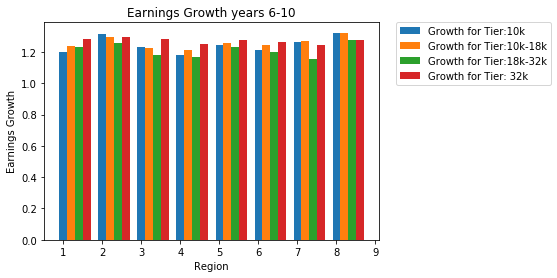

In [23]:
fig = plt.figure()
fig.add_subplot()

y1 = earningsgrowth10k
y2 = earningsgrowth10k_18k
y3 = earningsgrowth18k_32k
y4 = earningsgrowth32kk

x_axis = [x  for x in range(1,9)]
x_axis2 = [x + 0.2 for x in range(1,9)]
x_axis3 = [x + 0.4for x in range(1,9)]
x_axis4 = [x + 0.6 for x in range(1,9)]

plt.bar(x_axis, y1, width = 0.2, label='Growth for Tier:10k')
plt.bar(x_axis2, y2, width = 0.2, label='Growth for Tier:10k-18k')
plt.bar(x_axis3, y3, width = 0.2, label='Growth for Tier:18k-32k')
plt.bar(x_axis4, y4, width = 0.2, label='Growth for Tier: 32k')

plt.title("Earnings Growth years 6-10")
plt.xlabel("Region")
plt.ylabel("Earnings Growth")
plt.legend(title=["Earnings Growth years 6-10"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#save fig
#plt.savefig("Plots/Worth_it.png")

# Worth it ratio

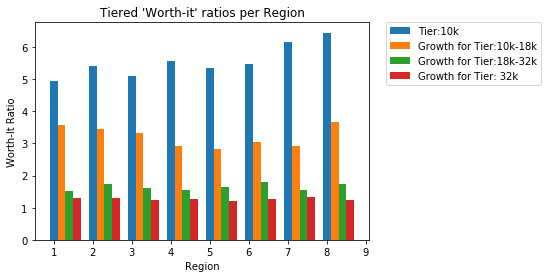

In [24]:
#test bar chart for growth mean 10k 

fig = plt.figure()
fig.add_subplot()

y1 = weighted_growth10k
y2 = weighted_growth10k_18k
y3 = weighted_growth18k_32k
y4 = weighted_growth32k

x_axis = [x  for x in range(1,9)]
x_axis2 = [x + 0.2 for x in range(1,9)]
x_axis3 = [x + 0.4for x in range(1,9)]
x_axis4 = [x + 0.6 for x in range(1,9)]

plt.bar(x_axis, y1, width = 0.2, label='Tier:10k')
plt.bar(x_axis2, y2, width = 0.2, label='Growth for Tier:10k-18k')
plt.bar(x_axis3, y3, width = 0.2, label='Growth for Tier:18k-32k')
plt.bar(x_axis4, y4, width = 0.2, label='Growth for Tier: 32k')

plt.title("Tiered 'Worth-it' ratios per Region")
plt.xlabel("Region")
plt.ylabel("Worth-It Ratio")
plt.legend(title=[""])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#save fig
#plt.savefig("Plots/Worth_it.png")